View dataset

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


data=pd.read_csv("traffic.csv")
data.head()


data['DateTime'] = pd.to_datetime(data['DateTime'])

# Extract and assign components of the datetime to new columns
data['Year'] = data['DateTime'].dt.year
data['Month'] = data['DateTime'].dt.month
data['DayOfMonth'] = data['DateTime'].dt.day
data['Hour'] = data['DateTime'].dt.hour
data['Minute'] = data['DateTime'].dt.minute
data['Second'] = data['DateTime'].dt.second

#Monday is assigned 1, Tue 2 and so on..
data['WeekDay'] = data['DateTime'].dt.weekday + 1

# Drop ID because it is just for identification purpose and not of use in prediction
# Drop Datetime as we split Date, day, hr, second into different columns
# Drop Minute,Second as it is always 0 because the data is collected at every hour
data = data.drop(['ID', 'DateTime', 'Minute', 'Second'], axis=1)


# Display the first few rows of the dataframe to verify the changes
data.head()

,Junction,Vehicles,Year,Month,DayOfMonth,Hour,WeekDay
0,1,15,2015,11,1,0,7
1,1,13,2015,11,1,1,7
2,1,10,2015,11,1,2,7
3,1,7,2015,11,1,3,7
4,1,9,2015,11,1,4,7


In [3]:
import pandas as pd
data = pd.read_csv('traffic.csv')

print(data.head())
print(data.info())

              DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [4]:
data=pd.read_csv("traffic.csv")
data.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [5]:
data_features = ['DateTime','Junction','Vehicles','ID']

X = data[data_features]
y = data['Vehicles']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Mean Squared Error: 29.623470490440567
Root Mean Squared Error: 5.442744757054162
Mean Absolute Error: 3.368183707398171
R-squared Score: 0.9273127047855028


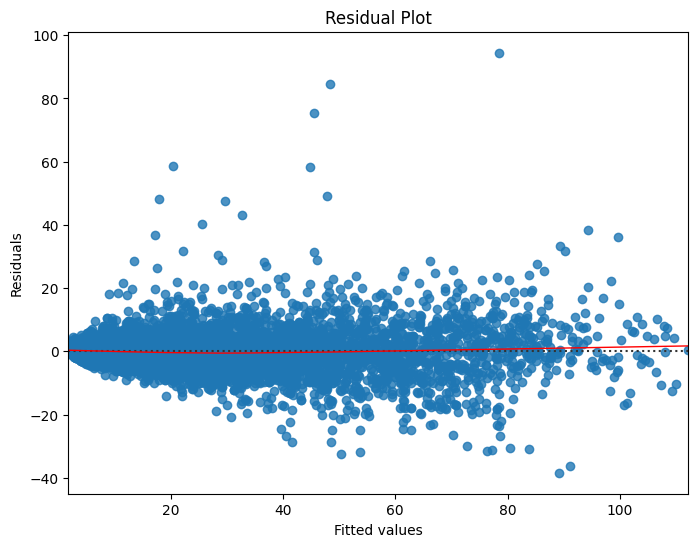

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame containing the dataset
data=pd.read_csv("traffic.csv")
# Convert datetime column to datetime data type
data['DateTime'] = pd.to_datetime(data['DateTime'])

# Extract relevant features from datetime column
data['year'] = data['DateTime'].dt.year
data['month'] = data['DateTime'].dt.month
data['day'] = data['DateTime'].dt.day
data['hour'] = data['DateTime'].dt.hour

# Drop original datetime column
data.drop(columns=['DateTime'], inplace=True)

# Split data into features (X) and target (y)
X = data.drop(columns=['Vehicles'])
y = data['Vehicles']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNeighborsRegressor model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared Score:", r2)

# Plot residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residual Plot')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Visualize K-nearest neighbors
# Note: This visualization works only for 2D or 3D feature spaces
if X_train.shape[1] <= 3:
    from matplotlib.colors import ListedColormap

    # Define mesh grid for visualization
    h = .02  # step size in the mesh
    x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
    y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary by assigning a color to each point in the mesh [x_min, x_max]x[y_min, y_max]
    Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']), alpha=0.8)


